# Metehan Ayhan - Fashion Deep Learning Recommendation Systems

- Dataset: <a href=https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small>Dataset</a>

In [5]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [ ]:
#Extract Filenames from Folder

In [7]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [8]:
len(filenames)

44441

In [9]:
#Importing ResNet50 Model and Cofiguration

In [10]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [11]:
#Extracting Fetaures from Image

In [12]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [13]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


array([0.        , 0.01761625, 0.001716  , ..., 0.01247231, 0.02726394,
       0.0689925 ], dtype=float32)

In [72]:
image_features = []
for file in filenames[0:5]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


[array([0.        , 0.01761625, 0.001716  , ..., 0.01247231, 0.02726394,
        0.0689925 ], dtype=float32),
 array([0.        , 0.03648944, 0.        , ..., 0.00997931, 0.0237553 ,
        0.04649903], dtype=float32),
 array([0.        , 0.03642139, 0.00710439, ..., 0.00140779, 0.        ,
        0.05435034], dtype=float32),
 array([0.00232171, 0.05030547, 0.00747744, ..., 0.00346683, 0.03391019,
        0.04565724], dtype=float32),
 array([0.00306834, 0.06240455, 0.        , ..., 0.00170627, 0.02032891,
        0.05833261], dtype=float32)]

In [27]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [29]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [31]:
#Loading Pickle Files

In [33]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [35]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [37]:
np.array(Image_features).shape

(500, 2048)

In [39]:
#Finidng Simialar Images

In [41]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [43]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [49]:
input_image = extract_features_from_images('images/16871.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


In [51]:
distance,indices = neighbors.kneighbors([input_image])

In [53]:
indices[0]

array([195, 194, 215, 297, 139, 258], dtype=int64)

In [55]:
from IPython.display import Image

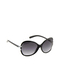

In [59]:
Image('images/16871.jpg')

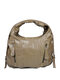

In [61]:
Image(filenames[indices[0][1]])

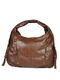

In [63]:
Image(filenames[indices[0][2]])

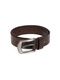

In [65]:
Image(filenames[indices[0][3]])

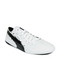

In [67]:
Image(filenames[indices[0][4]])

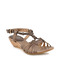

In [69]:
Image(filenames[indices[0][5]])